In [1]:
from modules import *
from sim import *


In [2]:
#sim_eps0p01 = Sim(ALPHA_EPS0P01, "gridded_data_small.npz", epsilon_SF=0.01)
#sim_eps0p1 = Sim(ALPHA_EPS0P1, "gridded_data_small.npz", epsilon_SF=0.1)
#sim_eps1p0 = Sim(ALPHA_EPS1P0, "gridded_data_small.npz", epsilon_SF=1.0)
sim_gas = Sim(GAS, "gridded_data_small.npz", epsilon_SF=None)
#list_of_sim = [sim_eps0p01, sim_eps0p1, sim_eps1p0, sim_gas]


Moving to directory '/home/za9132/scratch/romain/gas'.


In [3]:
sim = sim_gas


### Accretion

In [4]:
h = np.cross(sim.coord, sim.vel_vec, axis=0)
h_tot = sim.calc_mean(h, weight=(sim.density * sim.dV), axis=(1, 2, 3), do_sum=True)
h_scalar = calc_proj(h, h_tot[:, None, None, None])

Ldot = sim.interp_to_sph(h_scalar * sim.density * sim.vel_vec_sph_at_cart[R]) * sim.dA_hph
Ldot1d = sim.calc_mean(Ldot, axis=(1, 2), do_sum=True)


Text(0, 0, '$z$')

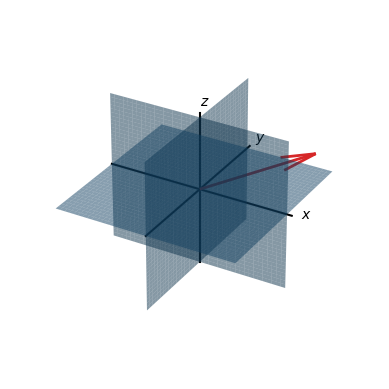

In [6]:
ax = plt.figure().add_subplot(projection='3d')

x, y = np.mgrid[-1:1:0.05, -1:1:0.05]
z = np.zeros_like(x)

ax.plot_surface(x, y, z, color='C0', alpha=0.5)
ax.plot_surface(z, y, x, color='C0', alpha=0.5)
ax.plot_surface(x, z, y, color='C0', alpha=0.5)

ax.quiver(0, 0, 0, h_tot[X], h_tot[Y], h_tot[Z], length=1.2, normalize=True, lw=2, color='C3')

ax.plot([-1, 1], [0, 0], [0, 0], color='black')
ax.plot([0, 0], [-1, 1], [0, 0], color='black')
ax.plot([0, 0], [0, 0], [-1, 1], color='black')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

ax.axis("off")

ax.text(1.1, 0, 0, r"$x$")
ax.text(0, 1.1, 0, r"$y$")
ax.text(0, 0, 1.1, r"$z$")

# sim.save_fig("L-axis")


Text(0.5, 1.0, '$L_0$ is the angular momentum of $M_\\odot$ in a circular Keplerian orbit at $r = 1~{\\rm kpc}$')

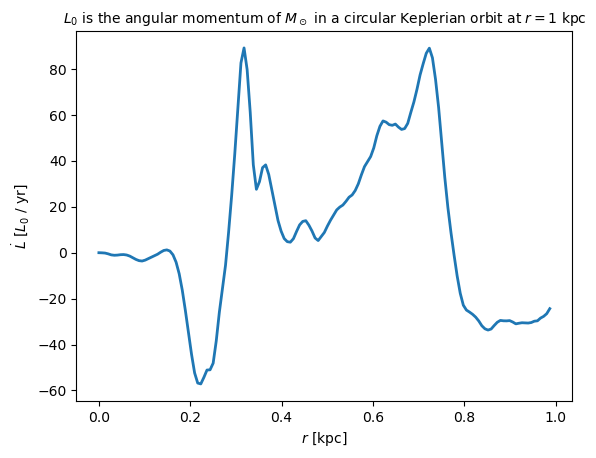

In [11]:
radius = 1 * const.kpc
M_enc = sim.calc_mean(sim.density * sim.dV, cond=(sim.coord_sph[R] < radius), do_sum=True)
L0 = const.M_sol * np.sqrt(const.G * M_enc * radius)

plt.plot(sim.coord1d_sph[R] / const.kpc, Ldot1d / (L0 / const.yr), lw=2)

plt.xlabel(r"$r$ [kpc]")
plt.ylabel(r"$\dot{L}$ [$L_0~/~{\rm yr}$]")

plt.title(r"$L_0$ is the angular momentum of $M_\odot$ in a circular Keplerian orbit at $r = %.3g~{\rm kpc}$" % (radius / const.kpc), fontsize=10)

# sim.save_fig("Ldot")


In [5]:
Mdot = -sim.interp_to_sph(sim.vel_vec_sph_at_cart[R] * sim.density) * sim.dA_hph
Mdot1d = sim.calc_mean(Mdot, axis=(1, 2), do_sum=True)
density_sph = sim.interp_to_sph(sim.density)


Text(0, 0.5, '$\\dot{M}$ [${\\rm M_\\odot/yr}$]')

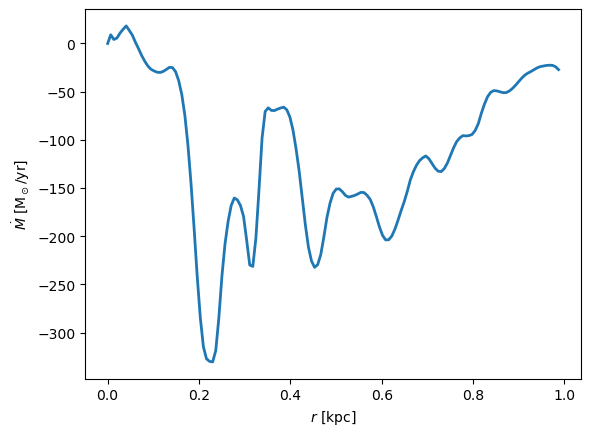

In [6]:
plt.plot(sim.coord1d_sph[R] / const.kpc, Mdot1d / (const.M_sol / const.yr), lw=2)

plt.xlabel(r"$r$ [kpc]")
plt.ylabel(r"$\dot{M}$ [${\rm M_\odot/yr}$]")

# sim.save_fig("Mdot")


Text(0.5, 1.0, '$r = 1~{\\rm kpc}$')

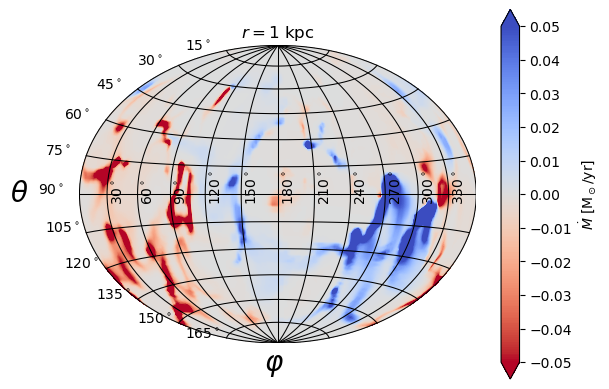

In [7]:
radius = 1. * const.kpc
radius_idx = np.argmin(np.abs(sim.coord1d_sph[R] - radius))

sim.plot_AH(Mdot[radius_idx] / (const.M_sol / const.yr), (-0.05, 0.05), do_log=False, cmap='coolwarm_r', num_axis_lines=12, cbar_tick_increment=0.01, cbar_label=r'$\dot{M}$ [${\rm M_\odot/yr}$]')

plt.title(r"$r = %.3g~{\rm kpc}$" % (radius / const.kpc))

# sim.save_fig("Mdot-sph")


Text(0.5, 1.0, '$r \\in [0, 1]~{\\rm kpc}$')

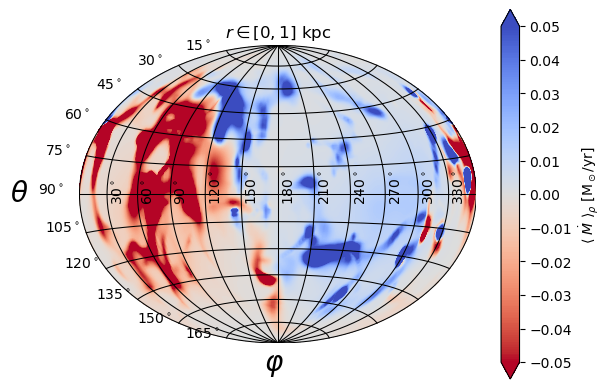

In [10]:
radius_in, radius_out = 0. * const.kpc, 1 * const.kpc
cond = (sim.coord_sph[R] < radius_out) * (sim.coord_sph[R] > radius_in)

Mdot_avg = sim.calc_mean(Mdot, weight=(density_sph * sim.dx_sph[R]), cond=cond, axis=R)

sim.plot_AH(Mdot_avg / (const.M_sol / const.yr), (-0.05, 0.05), do_log=False, cmap='coolwarm_r', num_axis_lines=12, cbar_tick_increment=0.01, cbar_label=r'$\langle~\dot{M}~\rangle_\rho$ [${\rm M_\odot/yr}$]')

plt.title(r"$r \in [%.3g, %.3g]~{\rm kpc}$" % (radius_in / const.kpc, radius_out / const.kpc))

# sim.save_fig("Mdot-sph-avg")


### Dust

Text(0.5, 1.0, '$|x| < 1~{\\rm kpc}$')

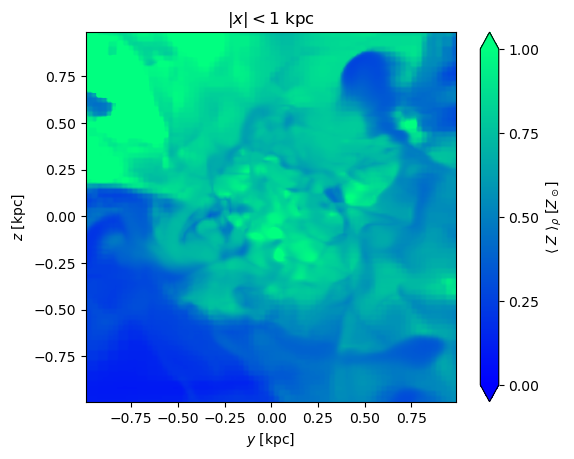

In [11]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.metallicity / const.Z_sol, (0, 1), avg=True, slice=slice, weight=sim.density, project=True, do_log=False, cmap='winter', cbar_label=r'$\langle~Z~\rangle_\rho$ [$Z_\odot$]', cbar_tick_increment=0.25)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("metal-proj-%s" % slice_label)


Text(0.5, 1.0, '$|x| < 1~{\\rm kpc}$')

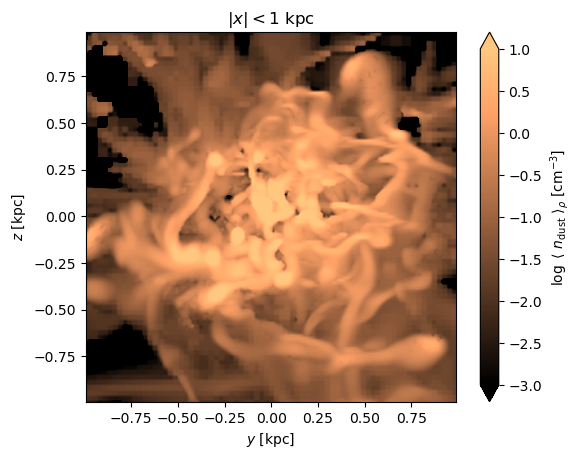

In [6]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.n_dust, (1e-3, 1e1), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='copper', cbar_label=r'$\log~\langle~n_{\rm dust}~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("dust-proj-%s" % slice_label)


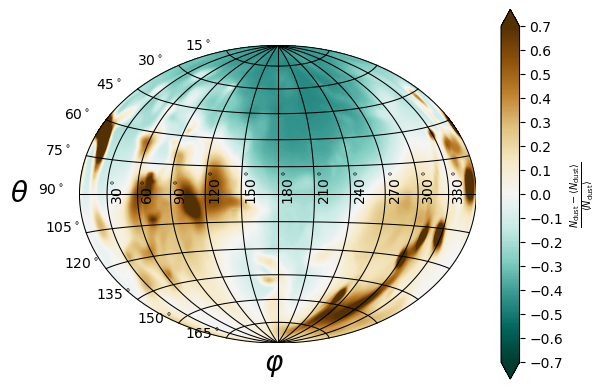

In [11]:
n_dust_sph = sim.interp_to_sph(sim.n_dust)
N_dust = np.sum(n_dust_sph * sim.dx_sph[R], axis=R)
N_dust_avg = np.sum(N_dust * sim.dA_hph[-1]) / np.sum(sim.dA_hph[-1])
N_dust_delta = (N_dust - N_dust_avg) / N_dust_avg

sim.plot_AH(N_dust_delta, (-0.7, 0.7), do_log=False, cmap='BrBG_r', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\frac{N_{\rm dust} - \langle N_{\rm dust}\rangle}{\langle N_{\rm dust}\rangle}$')
        
# sim.save_fig("dust-sph")
    

### Multi-freefall Model

Text(0.5, 1.0, '$|z| < 1~{\\rm kpc}$')

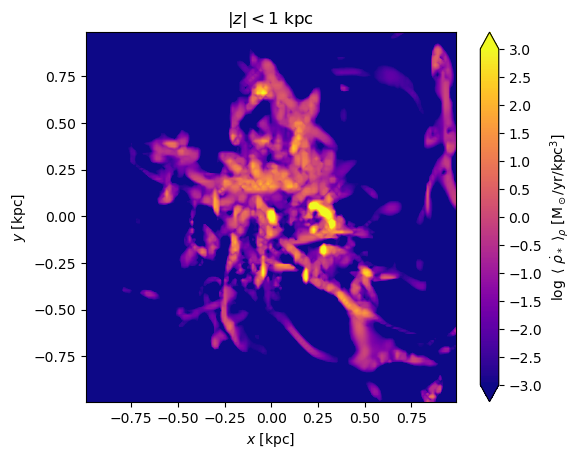

In [4]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.SFR_density / (const.M_sol / const.yr / const.kpc**3), (1e-3, 1e3), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\dot{\rho}_*~\rangle_\rho$ [${\rm M_\odot/yr/kpc^3}$]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("SFR-proj-%s" % slice_label)


### Gas Properties

Text(0.5, 1.0, '$|z| < 1~{\\rm kpc}$')

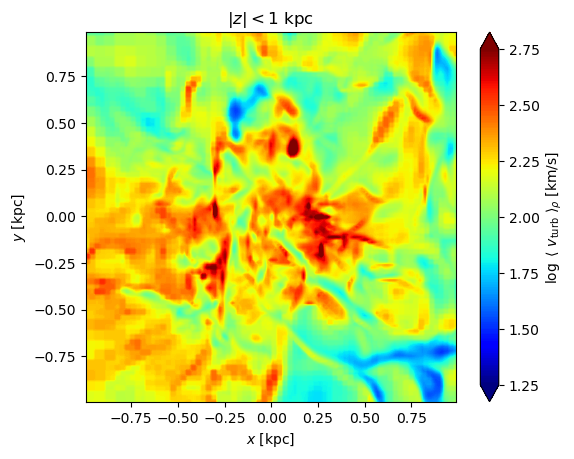

In [5]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.vel_turb / (const.km), (10**(1.25), 10**(2.75)), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='jet', cbar_label=r'$\log~\langle~v_{\rm turb}~\rangle_\rho$ [km/s]', cbar_tick_increment=0.25)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("v-proj-%s" % slice_label)


Text(0.5, 1.0, '$|x| < 1~{\\rm kpc}$')

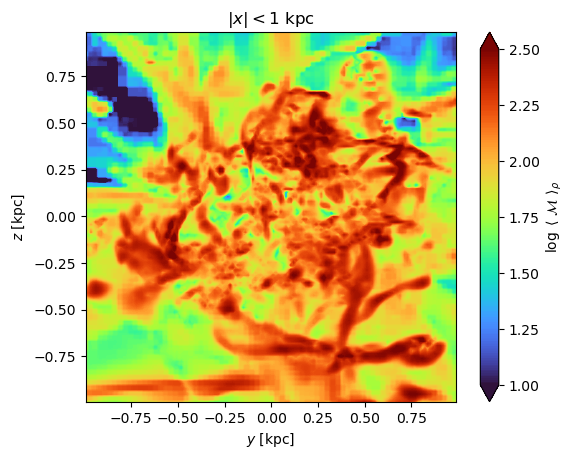

In [6]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.mach, (10**(1.), 10**(2.5)), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='turbo', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=0.25)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("mach-proj-%s" % slice_label)


Text(0.5, 1.0, '$|x| < 1~{\\rm kpc}$')

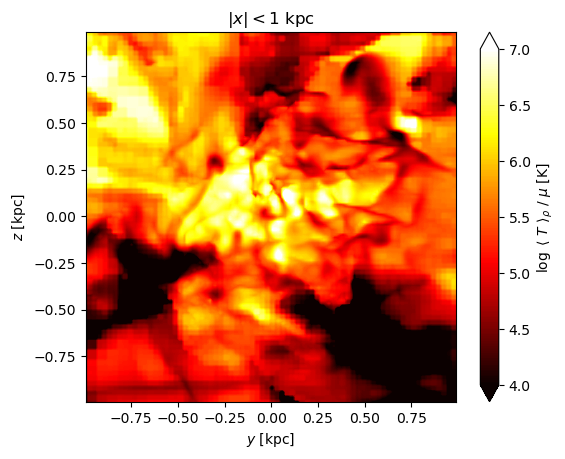

In [11]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.temp, (1e4, 1e7), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='hot', cbar_label=r'$\log~\langle~T~\rangle_\rho~/~\mu$ [K]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("temp-proj-%s" % slice_label)


Text(0.5, 1.0, '$|x| < 1~{\\rm kpc}$')

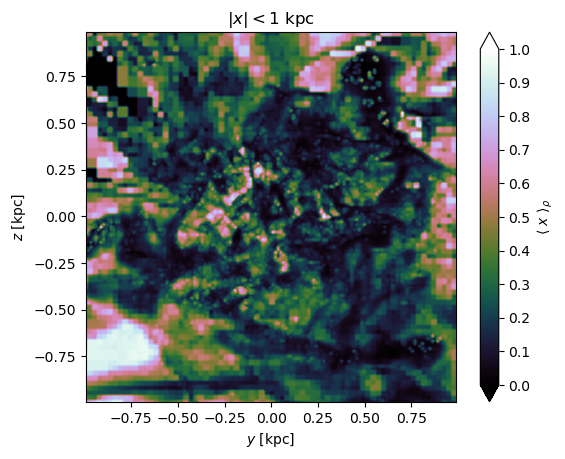

In [18]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.ion_frac, (0, 1), avg=True, slice=slice, weight=sim.density, project=True, do_log=False, cmap='cubehelix', cbar_label=r'$\langle~x~\rangle_\rho$', cbar_tick_increment=0.1)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("temp-proj-%s" % slice_label)


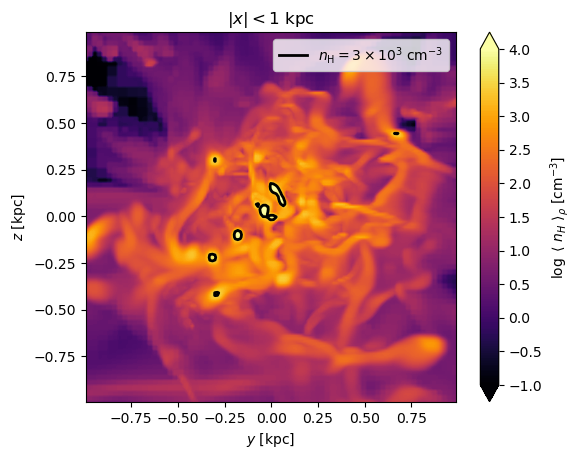

In [19]:
slice = X
slice_label = ["x", "y", "z"][slice]

n_H_crit_ffb = 3e3
cond_ffb = sim.n_H < n_H_crit_ffb

sim.plot_slice(sim.n_H, (1e-1, 1e4), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~n_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5, isocontours=[n_H_crit_ffb])

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

custom_lines = [Line2D([0], [0], color='black', lw=2)]
plt.legend(custom_lines, [r'$n_{\rm H} = 3\times 10^{3}~{\rm cm^{-3}}$'])

# sim.save_fig("density-proj-%s" % slice_label)


In [22]:
n_H_2d, temperature_2d, mass_2d = sim.calc_phase(sim.n_H, sim.temp, (1e-4, 1e5), (1e1, 1e9), nbins=200)


Text(0.5, 1.0, '$|x|, |y|, |z| < 1~{\\rm kpc}$')

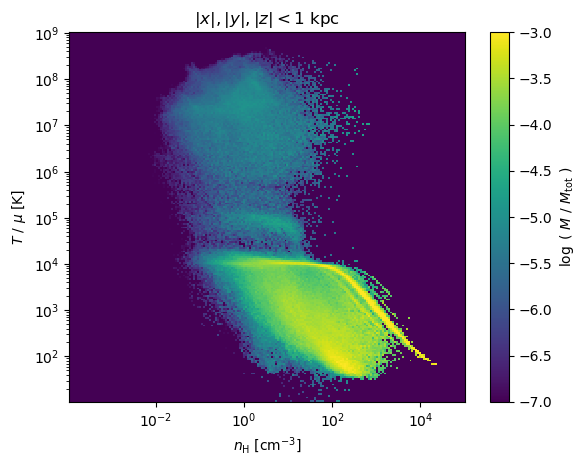

In [23]:
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)

plt.pcolor(n_H_2d, temperature_2d, np.log10(mass_frac_2d + epsilon), vmin=-7, vmax=-3)

plt.xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
plt.ylabel(r"$T~/~\mu$ [K]")

plt.xscale('log')
plt.yscale('log')

plt.colorbar(label=r'$\log~(~M~/~M_{\rm tot}~)$')

plt.title(r'$|x|, |y|, |z| < 1~{\rm kpc}$')

# sim.save_fig("density-temp-phase")


In [16]:
r1d, density1d = sim.calc_radial_profile(sim.density, nbins=100)


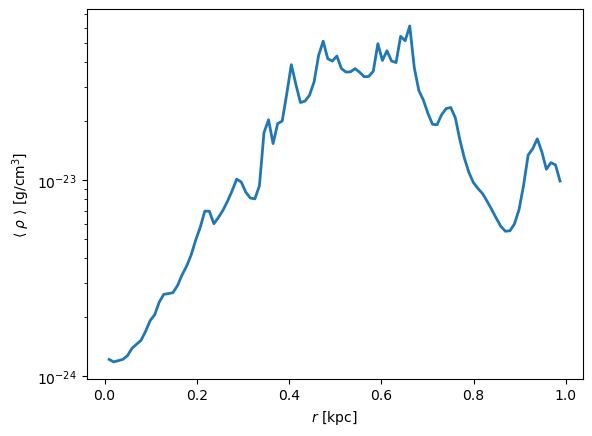

In [17]:
plt.plot(r1d / const.kpc, density1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.yscale('log')

# sim.save_fig("density-1d")


In [14]:
r1d, temp1d = sim.calc_radial_profile(sim.temp, weight=sim.density, nbins=100)


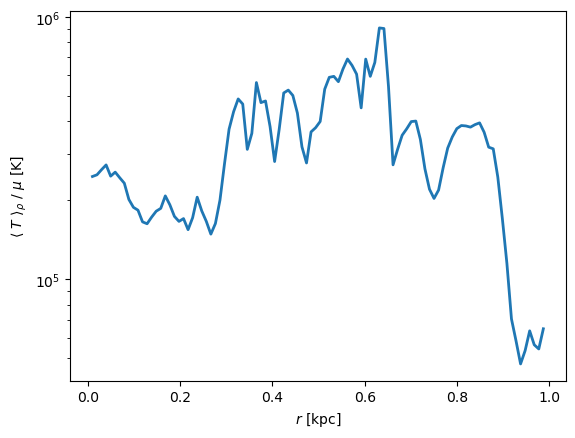

In [15]:
plt.plot(r1d / const.kpc, temp1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~T~\rangle_\rho~/~\mu$ [K]')

plt.yscale('log')

# sim.save_fig("temp-1d")


In [10]:
r1d, energy_turb1d = sim.calc_radial_profile(sim.energy_turb, weight=sim.density, nbins=100)
vel_turb1d = np.sqrt(2 * energy_turb1d)


Text(0, 0.5, '$\\langle~v_{\\rm turb}~\\rangle_\\rho$ [km/s]')

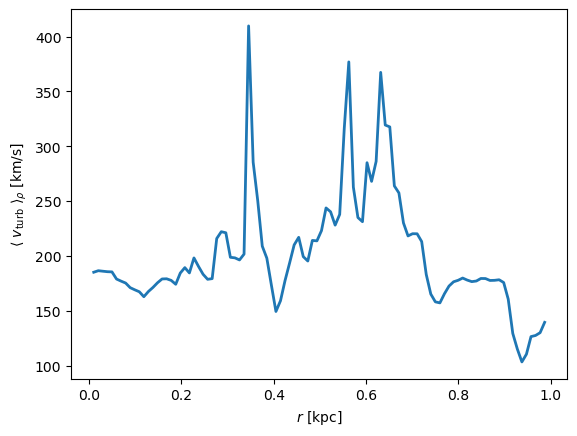

In [13]:
plt.plot(r1d / const.kpc, vel_turb1d / (const.km), lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~v_{\rm turb}~\rangle_\rho$ [km/s]')

# sim.save_fig("v-turb-1d")


### Refinement

Text(0.5, 1.0, '$x = 0~{\\rm kpc}$')

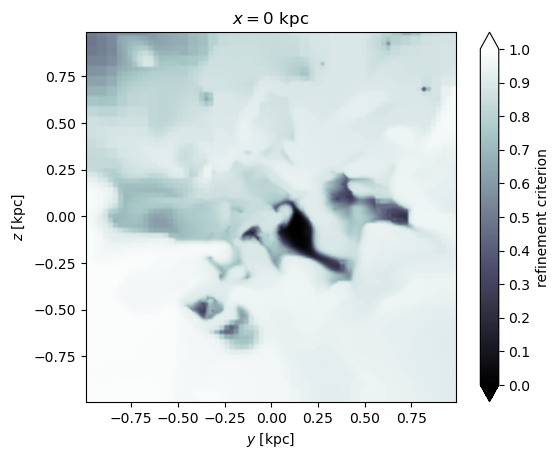

In [19]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.ref_crit, (0., 1.), slice=slice, project=False, do_log=False, cmap='bone', cbar_label='refinement criterion', cbar_tick_increment=0.1)

plt.title(r'$%s = 0~{\rm kpc}$' % slice_label)

# sim.save_fig("refine-proj-%s" % slice_label)


### Star Formation Rate

Text(0.5, 1.0, '$|x|, |y|, |z| < 1~{\\rm kpc}$')

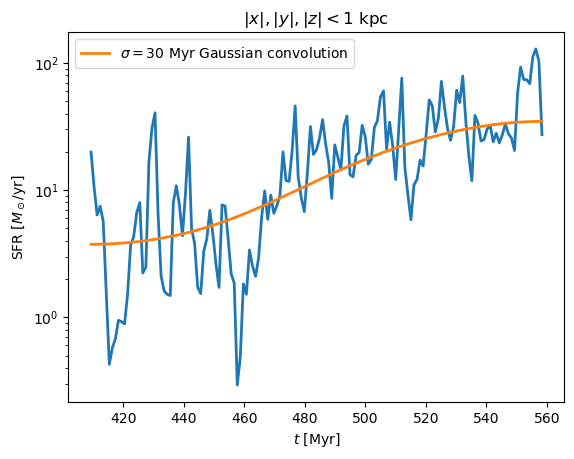

In [28]:
nbins = 150
filter_sigma = 30 * const.Myr
time_range = 150 * const.Myr

counts, bins = np.histogram(sim.time_starbirth, bins=np.linspace(sim.time_now - time_range, sim.time_now, nbins), weights=sim.mass_star)

time_starbirth = bins[:-1] + np.diff(bins)[0]
mass_star = counts
SFR_mass = mass_star / np.diff(bins)[0]

filter_sigma_idx = filter_sigma / np.diff(time_starbirth)[0]
SFR_mass_smoothed = 10**gaussian_filter(np.log10(SFR_mass + epsilon), sigma=filter_sigma_idx)

plt.plot(time_starbirth / const.Myr, SFR_mass / const.M_sol * const.yr, lw=2, color='C0')
plt.plot(time_starbirth / const.Myr, SFR_mass_smoothed / const.M_sol * const.yr, lw=2, color='C1', label=r'$\sigma = %.3g~{\rm Myr}$ Gaussian convolution' % (filter_sigma / const.Myr))

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

plt.yscale('log')

plt.legend()

plt.title(r'$|x|, |y|, |z| < 1~{\rm kpc}$')

# sim.save_fig("SFR")


Text(0.5, 1.0, '$\\sigma = 30~{\\rm Myr}$ Gaussian convolution')

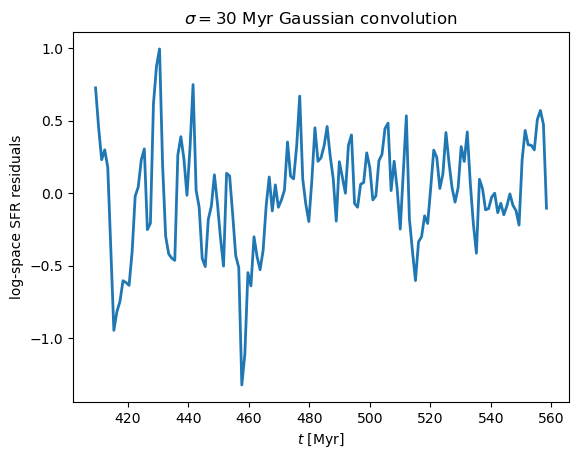

In [31]:
log_SFR_res = np.log10(SFR_mass) - np.log10(SFR_mass_smoothed)

plt.plot(time_starbirth / const.Myr, log_SFR_res, lw=2)

plt.ylabel(r"log-space SFR residuals")
plt.xlabel(r"$t$ [Myr]")

plt.title(r'$\sigma = %.3g~{\rm Myr}$ Gaussian convolution' % (filter_sigma / const.Myr))

# sim.save_fig("SFR-res")


Text(0, 0.5, 'PSD [Myr]')

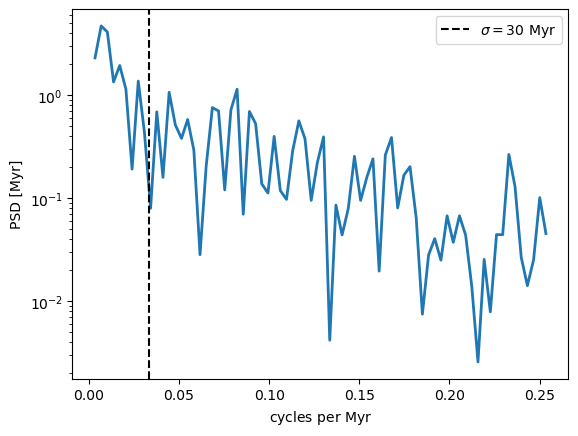

In [34]:
freq_starbirth, log_SFR_res_PSD = welch(log_SFR_res, fs=1/np.diff(star_birth_time)[0], detrend=None, scaling='density', nperseg=256)

plt.plot((freq_starbirth[1:] * const.Myr)**(1), log_SFR_res_PSD[1:] / const.Myr, lw=2)

plt.yscale('log')

plt.axvline(x=(filter_sigma**(-1) * const.Myr), color='black', linestyle='--', label=r'$\sigma = %.3g~{\rm Myr}$' % (filter_sigma / const.Myr))

plt.legend()

plt.xlabel(r"${\rm cycles\ per\ Myr}$")
plt.ylabel(r"PSD [Myr]")

# sim.save_fig("SFR-PSD")


### Summary Statistics

In [40]:
stats = {
    'fields': [sim.density, sim.temp, sim.metallicity / const.Z_sol, sim.vel_turb / const.km, sim.mach, sim.age_star / const.Myr],
    'names': ["density", "temperature", "metallicity", "turbulent velocity", "mach number", "star age"],
    'units': ["g/cm^3", "K", "Z_sol", "km/s", "", "Myr"],
    'weights': [None, sim.density, sim.density, sim.density, sim.density, sim.mass_star],
    'types': [HYDRO, HYDRO, HYDRO, HYDRO, HYDRO, STAR]
}

sim.calc_summary_stats(**stats, do_print=True)



AttributeError: 'Sim' object has no attribute 'dm_mass'

### Simulation Comparison

Saved figure as 'density-compare-092720231131.png'


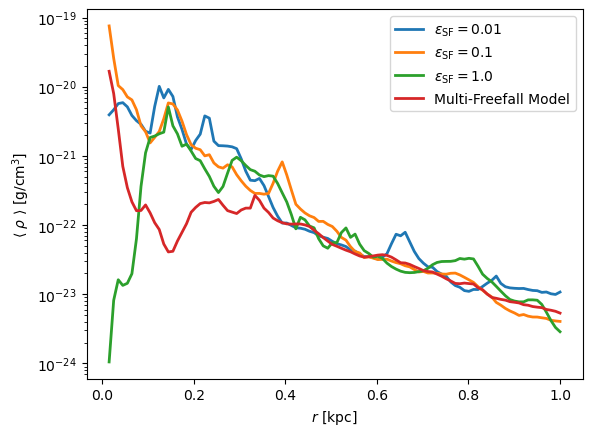

In [54]:
for sim in list_of_sim:
    
    r_1d, density_1d = sim.calc_radial_profile(sim.density, nbins=100)

    plt.plot(r_1d / const.kpc, density_1d, lw=2, label=sim.sim_latex)
    
plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.legend()

plt.yscale('log')

# save_fig('density-compare')


Saved figure as 'v-turb-compare-092720231130.png'


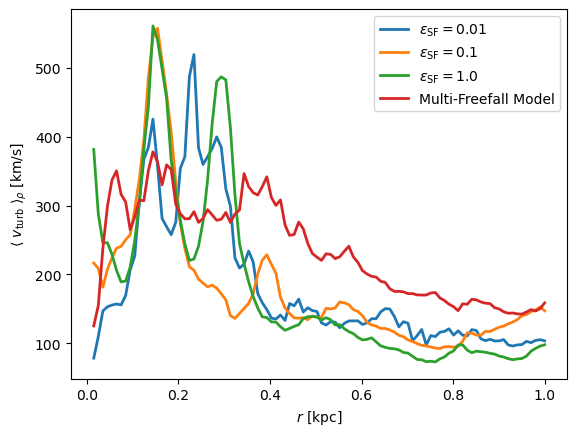

In [53]:
for sim in list_of_sim:
    
    r_1d, turb_energy_1d = sim.calc_radial_profile(sim.turb_energy, weight=sim.density, nbins=100)
    v_turb_1d = np.sqrt(2 * turb_energy_1d)

    plt.plot(r_1d / const.kpc, v_turb_1d / (const.km), lw=2, label=sim.sim_latex)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~v_{\rm turb}~\rangle_\rho$ [km/s]')

plt.legend()

# save_fig('v-turb-compare')


Saved figure as 'temp-compare-092720231130.png'


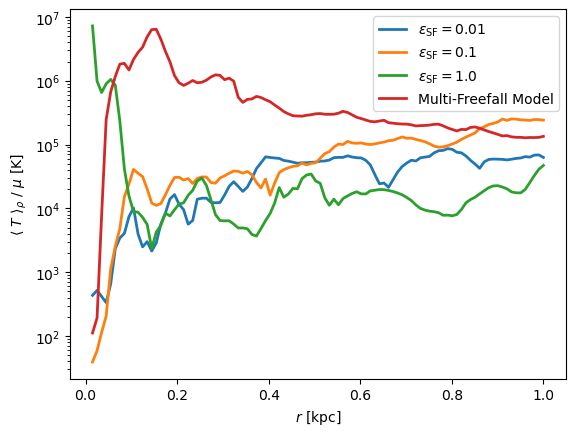

In [52]:
for sim in list_of_sim:
    
    r_1d, temperature_1d = sim.calc_radial_profile(sim.temperature, weight=sim.density, nbins=100)

    plt.plot(r_1d / const.kpc, temperature_1d, lw=2, label=sim.sim_latex)
    
plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~T~\rangle_\rho~/~\mu$ [K]')

plt.legend()

plt.yscale('log')

# save_fig('temp-compare')


Text(0.5, 1.0, '$|x|, |y|, |z| < 1~{\\rm kpc}$, $\\sigma = 10~{\\rm Myr}$')

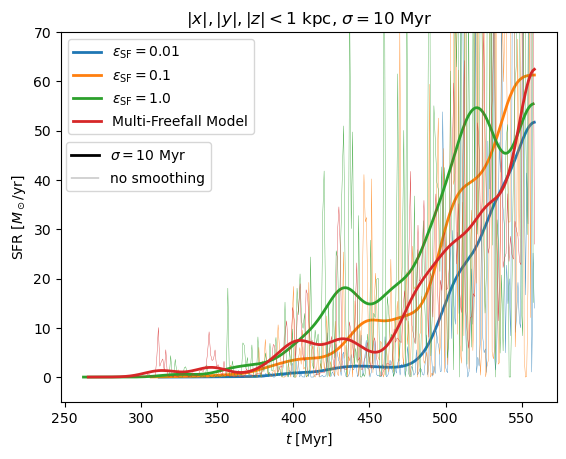

In [26]:
nbins = 300
filter_sigma = 10 * const.Myr

for i, sim in enumerate(list_of_sim):

    counts, bins = np.histogram(sim.star_birth_time, bins=nbins, weights=sim.star_mass)

    star_birth_time_1d = bins[:-1] + np.diff(bins)[0]
    star_mass_1d = counts
    SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

    filter_sigma_idx = filter_sigma / np.diff(star_birth_time_1d)[0]
    SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)
    
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=0.25, alpha=1., color='C%d' % i)
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, label=sim.sim_latex, color='C%d' % i)

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

legend1 = plt.legend()
custom_lines = [Line2D([0], [0], color='black', lw=2), Line2D([0], [0], color='black', lw=0.25)]
legend2 = plt.legend(custom_lines, [r'$\sigma=10~{\rm Myr}$', 'no smoothing'], loc=[0.01, 0.57])
plt.gca().add_artist(legend1)

plt.ylim(-5, 70)

plt.title(r'$|x|, |y|, |z| < 1~{\rm kpc}$, $\sigma = 10~{\rm Myr}$')

# save_fig('SFR-compare')
